# Ejercicio 2: Clasificación de frases según emojis. | k-Nearest Neighbors
### Tatsuki Garcilazo Kato

### Generamos los vectores para cada frase usando Word2Vec de NLTK

In [78]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import numpy as np
import nltk
import os

# Configurar y descargar recursos de NLTK
nltk_data_path = r"C:\Users\tatsu\nltk_data"  # Usa una ruta específica que aparezca en el error
os.makedirs(nltk_data_path, exist_ok=True)   # Crea la carpeta si no existe
nltk.download('punkt', download_dir=nltk_data_path)
nltk.data.path.append(nltk_data_path)

# Paso 1: Cargar el archivo CSV
data = pd.read_csv("emojis.csv")

# Paso 2: Tokenizar las frases
data['tokens'] = data['frase'].apply(lambda x: word_tokenize(x.lower()))

# Paso 3: Entrenar el modelo Word2Vec
# Usamos las frases tokenizadas como input para entrenar el modelo
sentences = data['tokens'].tolist()  # Listado de listas de tokens
model = Word2Vec(sentences, vector_size=50, window=3, min_count=1, workers=4)

# Paso 4: Generar vectores para cada frase
# Creamos una función para obtener el vector promedio de las palabras en cada frase
def frase_to_vector(tokens):
    # Si el token está en el vocabulario, se incluye en el promedio
    valid_vectors = [model.wv[token] for token in tokens if token in model.wv]
    if valid_vectors:
        # Promediar los vectores de las palabras en la frase
        return np.mean(valid_vectors, axis=0)
    else:
        # Si no hay palabras válidas, devolvemos un vector de ceros
        return np.zeros(model.vector_size)

# Aplicamos esta función a cada conjunto de tokens
data['vector'] = data['tokens'].apply(frase_to_vector)

# Paso 5: Guardar los resultados en un nuevo archivo CSV
# La columna 'vector' contiene los vectores generados
data.to_csv("emoji_with_vectors.csv", index=False)

model.save("modelo_word2vec.model")
print("Vectores generados y guardados en emoji_with_vectors.csv")

Vectores generados y guardados en emoji_with_vectors.csv


[nltk_data] Downloading package punkt to C:\Users\tatsu\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Entrenamos el modelo usando los vectores y su emoji asociado

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Paso 1: Cargar el dataset con vectores generados
data = pd.read_csv("emoji_with_vectors.csv")

# Paso 2: Preparar los datos para KNN
# Extraemos los vectores y las etiquetas (emojis)
X = data['vector'].apply(lambda x: np.fromstring(x[1:-1], sep=' '))  # Convertimos los vectores de string a arrays
X = np.stack(X)  # Convertimos la lista de arrays en una matriz
y = data['emoji']  # Las etiquetas son los emojis

# Paso 3: Crear y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X, y)



KNeighborsClassifier(n_neighbors=100)

### Generamos el vector de una nueva frase

In [99]:
import numpy as np
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
import nltk

# Asegurarnos de tener los datos de NLTK necesarios
nltk.download('punkt')

# Paso 1: Cargar el modelo Word2Vec entrenado
modelo_word2vec = Word2Vec.load("modelo_word2vec.model")  # Asegúrate de haber guardado el modelo previamente

# Paso 2: Función para convertir una frase a su vector promedio
def frase_a_vector(frase, modelo):
    """
    Convierte una frase en un vector promedio usando Word2Vec.
    Si una palabra no está en el vocabulario, se ignora.
    
    Args:
        frase (str): Frase a convertir.
        modelo (Word2Vec): Modelo Word2Vec entrenado.
    
    Returns:
        np.array: Vector promedio de la frase.
    """
    tokens = word_tokenize(frase.lower())  # Tokenizamos la frase
    vectores = []
    
    for token in tokens:
        if token in modelo.wv:
            vectores.append(modelo.wv[token])
    
    if len(vectores) == 0:
        # Si ninguna palabra está en el vocabulario, devolvemos un vector nulo
        return np.zeros(modelo.vector_size)
    
    # Calculamos el promedio de los vectores
    return np.mean(vectores, axis=0)

# Paso 3: Convertir una frase nueva
frase_nueva = "Estoy muy feliz"
vector_nueva_frase = frase_a_vector(frase_nueva, modelo_word2vec)

# Convertir el vector a una cadena separada por comas
vector_comas = ", ".join(map(str, vector_nueva_frase))

print("Frase:", frase_nueva)
print("Vector (separado por comas):", vector_comas)

Frase: Estoy muy feliz
Vector (separado por comas): 0.0076182857, -0.004258528, 0.004012972, 0.009972258, -0.009480055, -0.0060691386, 0.012652479, 0.008955529, -0.008370757, -0.005413871, 0.013312565, -0.00017741241, -0.0052474993, 0.015970547, -0.009860753, -0.0026249692, 0.012029288, 0.0077965655, -0.006819087, -0.01843259, 0.008597873, 0.0028389324, 0.01637214, 0.0019714346, 0.007930025, -0.0009964975, -0.0028266916, 0.00083451625, -0.0073938644, -0.0058378186, -0.00097037014, 0.008014961, 0.008874698, -0.0044755405, -0.008449728, -0.00019016373, 0.0012041568, -0.014641613, -0.0059541073, -0.013711432, -0.0022195438, -0.0007952377, -0.00034688972, -0.011583496, 0.0035501947, 0.009495619, -0.0154499095, -0.00047589466, 0.0006504785, 0.0066048503


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tatsu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Realizamos la predicción de la frase

Frase: Estoy muy feliz
Predicción para la nueva frase: 😊


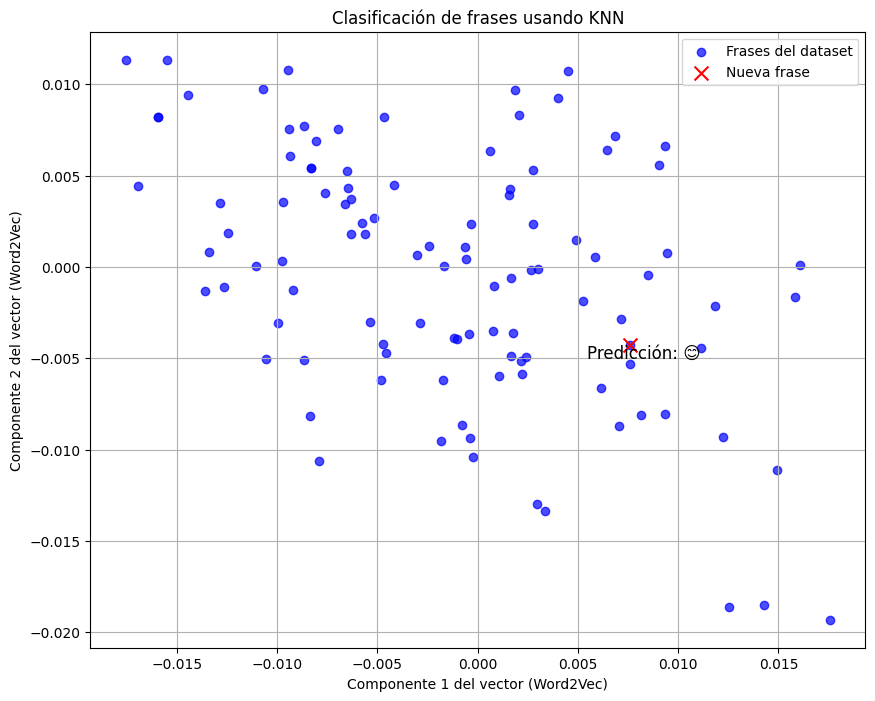

In [100]:
# Paso 4: Nueva frase a predecir
nueva_frase_vector = np.array([float(num) for num in vector_comas.split(",")])  # Sustituye por un vector real generado
nueva_frase_vector = nueva_frase_vector.reshape(1, -1)

# Paso 5: Realizar la predicción
print("Frase:", frase_nueva)
prediccion = knn.predict(nueva_frase_vector)
print(f"Predicción para la nueva frase: {prediccion[0]}")

# Paso 6: Visualizar las frases y la predicción
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c='blue', label='Frases del dataset', alpha=0.7)
plt.scatter(nueva_frase_vector[0, 0], nueva_frase_vector[0, 1], c='red', label='Nueva frase', marker='x', s=100)
plt.title('Clasificación de frases usando KNN')
plt.xlabel('Componente 1 del vector (Word2Vec)')
plt.ylabel('Componente 2 del vector (Word2Vec)')
plt.legend()
plt.grid()

# Anotar la predicción de la nueva frase
plt.annotate(f'Predicción: {prediccion[0]}',
             xy=(nueva_frase_vector[0, 0], nueva_frase_vector[0, 1]),
             textcoords="offset points", xytext=(10, -10), ha='center', fontsize=12)

plt.show()

## Conclusión

La verdad no quedó como se esperaba. Seguramente es debido a la calidad de las frases utilizadas en el dataset.